In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

import warnings
warnings.filterwarnings("ignore")

import re #for text manipulations
from nltk.corpus import stopwords  #for creating stepword object
from nltk.stem import SnowballStemmer  #text processing 
from nltk.stem import WordNetLemmatizer #text perocessing


# VADER
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [2]:
# Read in data
df = pd.read_csv('McDonald_s_Reviews.csv', encoding = "ISO-8859-1")
print(df.shape)

(33396, 10)


In [3]:
print(df.head)

<bound method NDFrame.head of        reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [5]:
# Drop not needed columns
df = df[['review','rating']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  33396 non-null  object
 1   rating  33396 non-null  object
dtypes: object(2)
memory usage: 521.9+ KB


In [7]:
df.head()

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [8]:
# Define Key to convert rating to number of stars
starkey = {'5 stars': 5, '4 stars': 4, '3 stars': 3, '2 stars': 2, '1 star': 1}

# Replace the values in multiple columns
df.replace(starkey, inplace=True)

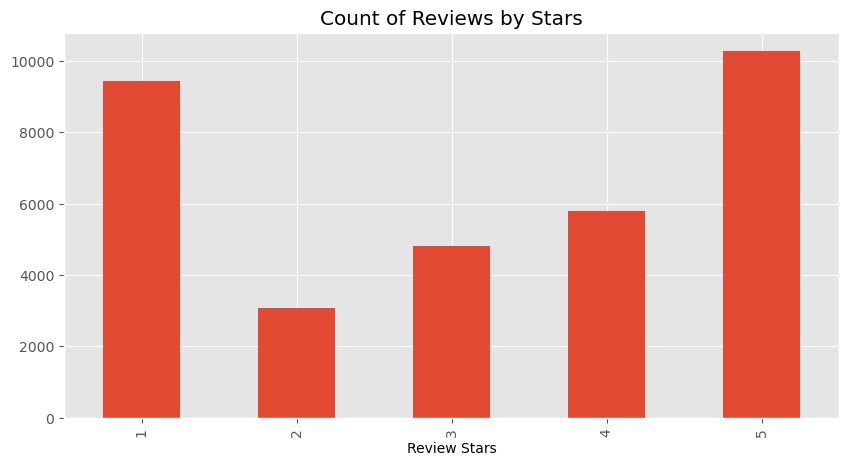

In [9]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [10]:
df['rating'].value_counts()

5    10274
1     9431
4     5787
3     4818
2     3086
Name: rating, dtype: int64

In [11]:
# The dataset is biased toward positive reviews (4, 5 stars)
# Total postive reviews (4, 5 stars) = 16061
# Total negative reviews (1, 2 stars) = 12517
# There are 28% more positive reviews than negative reviews
# Later on, I will drop 2, 3, and 4 star reviews to lower this to 9% more positive reviews

In [12]:
# Show sample review to check characters
example = df['review'][50]
print(example)

I went to this location tonight to see if they could give me the Oreo Mcflurry that a different McDonaldï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s had forgotten earlier they completely refused. Unbelievable.. Itï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½s ice creamï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï


In [13]:
# Remove non-english text and convert to lowercase
# Sources
# https://www.kaggle.com/code/aniketkadam702030/mcdonalds-store-reviews-keras
# https://medium.com/@priyaag0707/mcdonald-review-project-on-sentiment-analysis-4a5108c8eb53
def review_simplify(text):
    text=re.sub("\[.*#&]"," ",text)
    #removing the emails
    text=re.sub("https?://\S+|www\.\S+","",text)
    text=re.sub("[^a-zA-Z0-9\s]+","",text)
    #removing the numbers
    text = re.sub('\w*\d\w*', '', text)
    #removing the stepwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    return text
df['review']=df['review'].apply(review_simplify)  

def lowercase(text):
    text=text.lower()
    return text

df['review']=df['review'].apply(lowercase)

In [14]:
# Check if review is clean
example = df['review'][50]
print(example)

i went location tonight see could give oreo mcflurry different mcdonalds forgotten earlier completely refused unbelievable its ice cream


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  33396 non-null  object
 1   rating  33396 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 521.9+ KB


In [16]:
df.head()

,review,rating
0,why look like someone spit food i normal trans...,1
1,itd mcdonalds it far food atmosphere go the st...,4
2,made mobile order got speaker checked line mov...,1
3,my mc crispy chicken sandwich customer service...,5
4,i repeat order times drive thru still manage m...,1


In [17]:
# Drop rows with ratings of 2, 3, 4
# a = [3]
# df = df[~df['date'].isin(a)]
df2 = df[~df['rating'].isin([2, 3, 4])]

In [18]:
# # If extremely low on Ram, or processing a larger dataset, uncomment and run once sure df2 is correct.
# del df

In [19]:
# Convert reviews to binary classification
rating_outcome = []

for value in df2['rating']:
    if value < 3:
        rating_outcome.append(0)
    else:
        rating_outcome.append(1)
df2['LikeDislike'] = rating_outcome
df2.head(2)

,review,rating,LikeDislike
0,why look like someone spit food i normal trans...,1,0
2,made mobile order got speaker checked line mov...,1,0


In [20]:
# Check outcomes
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19705 entries, 0 to 33395
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review       19705 non-null  object
 1   rating       19705 non-null  int64 
 2   LikeDislike  19705 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 615.8+ KB


,review,rating,LikeDislike
0,why look like someone spit food i normal trans...,1,0
2,made mobile order got speaker checked line mov...,1,0
3,my mc crispy chicken sandwich customer service...,5,1
4,i repeat order times drive thru still manage m...,1,0
5,i work door dash locked us wait long line reas...,1,0


In [21]:
# Drop rating in favor of Like Dislike
df2 = df2.drop(columns=['rating'])
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19705 entries, 0 to 33395
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review       19705 non-null  object
 1   LikeDislike  19705 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 461.8+ KB


,review,LikeDislike
0,why look like someone spit food i normal trans...,0
2,made mobile order got speaker checked line mov...,0
3,my mc crispy chicken sandwich customer service...,1
4,i repeat order times drive thru still manage m...,0
5,i work door dash locked us wait long line reas...,0


In [22]:
## VADER Sentiment Scoring
# I am following a tutorial found here
# https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial/notebook

In [23]:
sia = SentimentIntensityAnalyzer()

In [24]:
sia.polarity_scores('food is good')

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}

In [25]:
sia.polarity_scores('food is good!')

{'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'compound': 0.4926}

In [26]:
sia.polarity_scores('Food is bad')

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

In [27]:
df3 = df2.reset_index(drop=True)

In [28]:
df3.head()

,review,LikeDislike
0,why look like someone spit food i normal trans...,0
1,made mobile order got speaker checked line mov...,0
2,my mc crispy chicken sandwich customer service...,1
3,i repeat order times drive thru still manage m...,0
4,i work door dash locked us wait long line reas...,0


In [29]:
df3["Id"] = df3.index + 1
df3.head()

,review,LikeDislike,Id
0,why look like someone spit food i normal trans...,0,1
1,made mobile order got speaker checked line mov...,0,2
2,my mc crispy chicken sandwich customer service...,1,3
3,i repeat order times drive thru still manage m...,0,4
4,i work door dash locked us wait long line reas...,0,5


In [30]:
df3.tail()

,review,LikeDislike,Id
19700,very well,1,19701
19701,they treated badly,0,19702
19702,the service good,1,19703
19703,its good lately become expensive,1,19704
19704,took good care,1,19705


In [31]:
# Get score for each review
res = {}
for i, row in tqdm(df3.iterrows(), total=len(df3)):
    text = row['review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/19705 [00:00<?, ?it/s]

In [32]:
# Process reviews with VADER
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df3, how='left')

In [33]:
vaders.head()

,Id,neg,neu,pos,compound,review,LikeDislike
0,1,0.045,0.777,0.178,0.5541,why look like someone spit food i normal trans...,0
1,2,0.096,0.904,0.000,-0.2960,made mobile order got speaker checked line mov...,0
2,3,0.000,1.000,0.000,0.0000,my mc crispy chicken sandwich customer service...,1
3,4,0.194,0.806,0.000,-0.7184,i repeat order times drive thru still manage m...,0
4,5,0.104,0.896,0.000,-0.2960,i work door dash locked us wait long line reas...,0


In [34]:
# Convert sentiment to binary classification
rating_outcome = []

for value in vaders['compound']:
    if value <= 0:
        rating_outcome.append(0)
    else:
        rating_outcome.append(1)
vaders['VadersLikeDislike'] = rating_outcome
vaders.head(10)

,Id,neg,neu,pos,compound,review,LikeDislike,VadersLikeDislike
0,1,0.045,0.777,0.178,0.5541,why look like someone spit food i normal trans...,0,1
1,2,0.096,0.904,0.000,-0.2960,made mobile order got speaker checked line mov...,0,0
2,3,0.000,1.000,0.000,0.0000,my mc crispy chicken sandwich customer service...,1,0
3,4,0.194,0.806,0.000,-0.7184,i repeat order times drive thru still manage m...,0,0
4,5,0.104,0.896,0.000,-0.2960,i work door dash locked us wait long line reas...,0,0
5,6,0.062,0.916,0.022,-0.5667,if i could give location zero customer service...,0,0
6,7,0.036,0.885,0.078,0.3818,came ordered large coffee wno ice they handed ...,0,1
7,8,0.242,0.758,0.000,-0.6901,went thru drive thru ordered getting home noti...,0,0
8,9,0.804,0.196,0.000,-0.6249,worst mcdonald,0,0
9,10,0.133,0.623,0.244,0.6415,the morning crew seems fast efficient night cr...,0,1


In [35]:
# Add star (1, 0) to VADER outcome (1, 0). If =1, did not match.
vaders['Check'] = vaders['LikeDislike'] + vaders['VadersLikeDislike']

In [36]:
vaders.head()

,Id,neg,neu,pos,compound,review,LikeDislike,VadersLikeDislike,Check
0,1,0.045,0.777,0.178,0.5541,why look like someone spit food i normal trans...,0,1,1
1,2,0.096,0.904,0.000,-0.2960,made mobile order got speaker checked line mov...,0,0,0
2,3,0.000,1.000,0.000,0.0000,my mc crispy chicken sandwich customer service...,1,0,1
3,4,0.194,0.806,0.000,-0.7184,i repeat order times drive thru still manage m...,0,0,0
4,5,0.104,0.896,0.000,-0.2960,i work door dash locked us wait long line reas...,0,0,0


In [37]:
# Check accuracy
outcomes_match = []

for value in vaders['Check']:
    if value == 1:
        outcomes_match.append(0)
    else:
        outcomes_match.append(1)
vaders['Match'] = outcomes_match
vaders.head(10)

,Id,neg,neu,pos,compound,review,LikeDislike,VadersLikeDislike,Check,Match
0,1,0.045,0.777,0.178,0.5541,why look like someone spit food i normal trans...,0,1,1,0
1,2,0.096,0.904,0.000,-0.2960,made mobile order got speaker checked line mov...,0,0,0,1
2,3,0.000,1.000,0.000,0.0000,my mc crispy chicken sandwich customer service...,1,0,1,0
3,4,0.194,0.806,0.000,-0.7184,i repeat order times drive thru still manage m...,0,0,0,1
4,5,0.104,0.896,0.000,-0.2960,i work door dash locked us wait long line reas...,0,0,0,1
5,6,0.062,0.916,0.022,-0.5667,if i could give location zero customer service...,0,0,0,1
6,7,0.036,0.885,0.078,0.3818,came ordered large coffee wno ice they handed ...,0,1,1,0
7,8,0.242,0.758,0.000,-0.6901,went thru drive thru ordered getting home noti...,0,0,0,1
8,9,0.804,0.196,0.000,-0.6249,worst mcdonald,0,0,0,1
9,10,0.133,0.623,0.244,0.6415,the morning crew seems fast efficient night cr...,0,1,1,0


In [38]:
vaders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19705 entries, 0 to 19704
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 19705 non-null  int64  
 1   neg                19705 non-null  float64
 2   neu                19705 non-null  float64
 3   pos                19705 non-null  float64
 4   compound           19705 non-null  float64
 5   review             19705 non-null  object 
 6   LikeDislike        19705 non-null  int64  
 7   VadersLikeDislike  19705 non-null  int64  
 8   Check              19705 non-null  int64  
 9   Match              19705 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [39]:
# Accuarcy
# Correct
VadersCorrect = vaders['Match'].sum()
print('Total Correct')
print(VadersCorrect)
# Total
VadersTotal = vaders['Id'].max()
print('Total Total')
print(VadersTotal)
# Accuracy
print('Vaders Accuarcy')
print(VadersCorrect/VadersTotal)


Total Correct
16315
Total Total
19705
Vaders Accuarcy
0.8279624460796752
